# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
In questa esercitazione calcoliamo il seguente integrale tramite metodi Monte Carlo:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
Il primo modo in cui lo calcoliamo è campionando gli $x_i$ da una distribuzione uniforme tra $[0,1]$: $$I=\int_a^b f(x)dx \qquad I=(b-a)\frac{1}{N}\sum_{i=1}^Nf(x_i)$$
Il risultato dell'integrale calcolato in questo modo è mostrato nella cella sottostante.

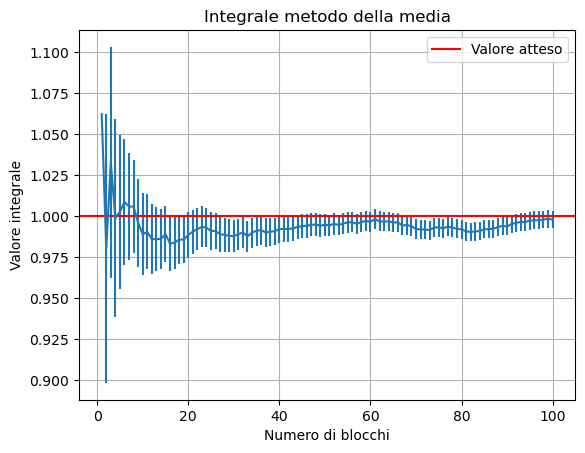

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def read_data_from_file(filename):
    with open(filename, 'r') as file:  # Modalità "r" per la lettura
        first_line = file.readline()
        num_columns = len(first_line.split())

    # Inizializza una lista di liste vuote per memorizzare i dati di ciascuna colonna
    data = [[] for _ in range(num_columns)]

    with open(filename, 'r') as file:  # Riapre il file per leggere tutti i dati
        for line in file:
            values = line.split()
            for i in range(num_columns):
                data[i].append(float(values[i]))

    return data

# Chiamata alla funzione per leggere i dati dal file
n, integr, integr_err, integr_hom, err_hom, integr_hom_2, err_hom_2 = read_data_from_file("risultati.dat")

plt.errorbar(n, np.array(integr), yerr=np.array(integr_err))
plt.title('Integrale metodo della media')
plt.xlabel('Numero di blocchi')
plt.ylabel('Valore integrale')
plt.axhline(y=1, color='red', label = "Valore atteso")
plt.legend()
plt.grid(True)
plt.show()

Il secondo modo in cui calcoliamo questo integrale è tramite il metodo dell'importance sampling, campionando una densità di probabilità
non uniforme tra $[0,1]$. Questo viene fatto fattorizzando la funzione $f(x)$ nel seguente modo: $$I=\int_{\Omega}g(x)p(x)dx \qquad p(x)\geq 0 \quad \forall x\in\Omega \qquad \int_{\Omega}p(x)dx=1$$ Per avere un risultato migliore è necessario scegliere $p(x)$ molto simile all'integranda.
Per farlo è stata scelta come $p(x)$ la seguente fuznione: 
$$p(x)=(-x^2+1)\frac{\pi}{2}$$
Che normalizzata risulta essere:
$$p(x)=\frac{3}{2}(-x^2+1)$$
Mentre la $g(x)$ risulta:
$$g(x)=\frac{f(x)}{p(x)}=\frac{\pi}{3}\left[\frac{cos\left(\frac{\pi x}{2}\right)}{1-x^2}\right]$$
Si estrae quindi casualmente un numero $x$ nell'intervallo di integrazione, e un numero $y$ tra $0$ e il valore massimo della distribuzione di probabilità $p(x)$, successivamente, se $y$ risulta essere minore di $p(x)$, valutata con l'$x$ estratto, il punto viene accettato, e viene quindi calcolata $g(x)$.
Nella cella sotto si vedono plotatte la funzione da integrare e la $p(x)$ scelta, mentre nella cella subito dopo si vede il risultato dell'integrale.

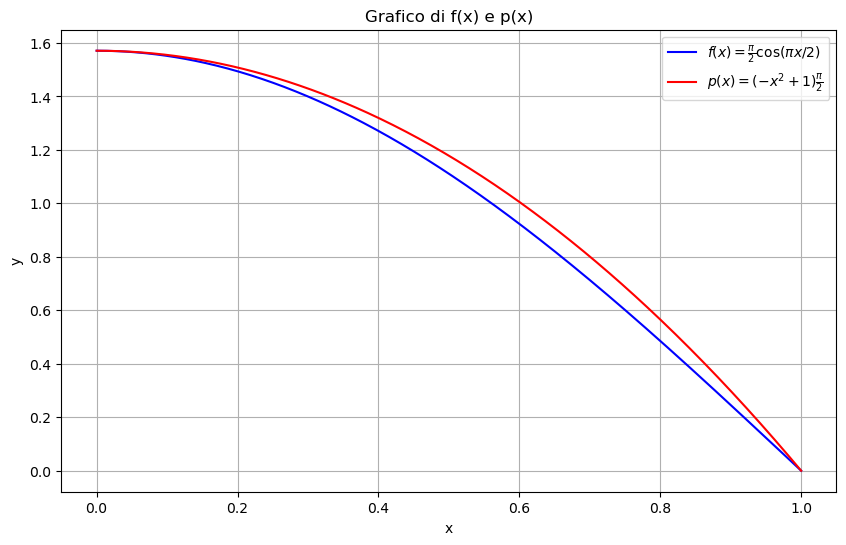

In [8]:
x = np.linspace(0, 1, 500)

# Definire le due funzioni
f1 = (np.pi / 2) * np.cos((np.pi * x) / 2)
f2 = (-x**2 + 1) * (np.pi / 2)

# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r'$f(x)=\frac{\pi}{2}\cos(\pi x/2)$', color='b')
plt.plot(x, f2, label=r'$p(x)=(-x^2+1)\frac{\pi}{2}$', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafico di f(x) e p(x)')
plt.legend()
plt.grid(True)
plt.show()

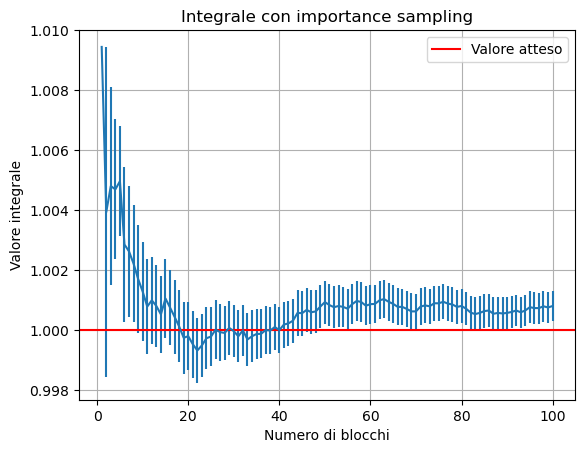

In [11]:
plt.errorbar(n, np.array(integr_hom), yerr=np.array(err_hom))
plt.title('Integrale con importance sampling')
plt.xlabel('Numero di blocchi')
plt.ylabel('Valore integrale')
plt.axhline(y=1, color='red', label = "Valore atteso")
plt.legend()
plt.grid(True)
plt.show()

E' stato poi rifatto con una funzione che approssimava peggio l'intregranda, in modo da vedere il peggioramento nel calcolo dell'integrale, in questo caso la $p(x)$ scelta è stata la seguente:
$$p(x)=-x^2+\frac{\pi}{2}$$
Che normalizzata risulta essere: $$p(x)=\frac{6(-x^2+\pi/2)}{3\pi-2}$$
Mentre la $g(x)$, di conseguenza, è: $$g(x)=\frac{f(x)}{p(x)}=\frac{\pi}{2}cos\left(\frac{\pi x}{2}\right)\frac{3\pi-2}{6(-x^2+\pi/2)}$$

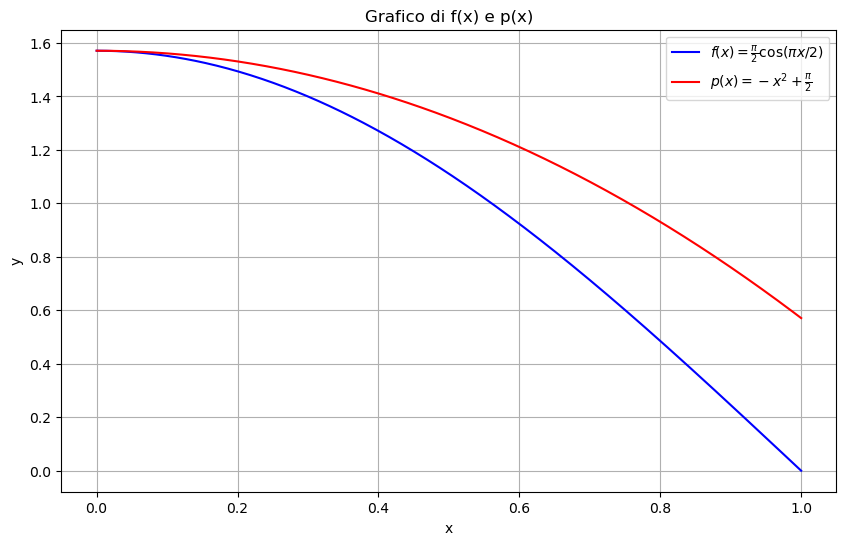

In [12]:
x = np.linspace(0, 1, 500)

# Definire le due funzioni
f1 = (np.pi / 2) * np.cos((np.pi * x) / 2)
f2 = -x**2 + (np.pi / 2)

# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r'$f(x)=\frac{\pi}{2}\cos(\pi x/2)$', color='b')
plt.plot(x, f2, label=r'$p(x)=-x^2+\frac{\pi}{2}$', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafico di f(x) e p(x)')
plt.legend()
plt.grid(True)
plt.show()

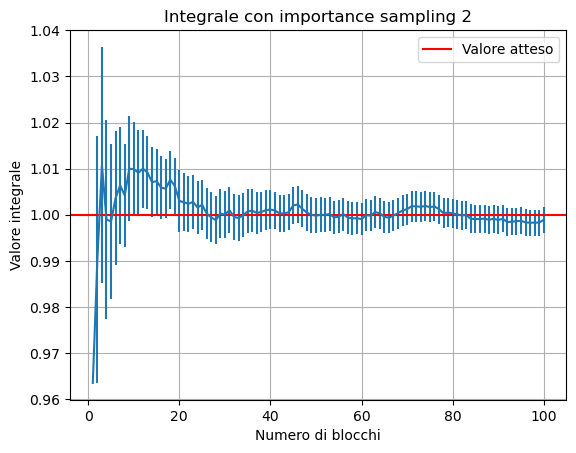

In [13]:
plt.errorbar(n, np.array(integr_hom_2), yerr=np.array(err_hom_2))
plt.title('Integrale con importance sampling 2')
plt.xlabel('Numero di blocchi')
plt.ylabel('Valore integrale')
plt.axhline(y=1, color='red', label = "Valore atteso")
plt.legend()
plt.grid(True)
plt.show()

Nella cella sottostante è possibile vedere tutti i grafici precedenti sovrapposti, per poterli confrontare meglio.

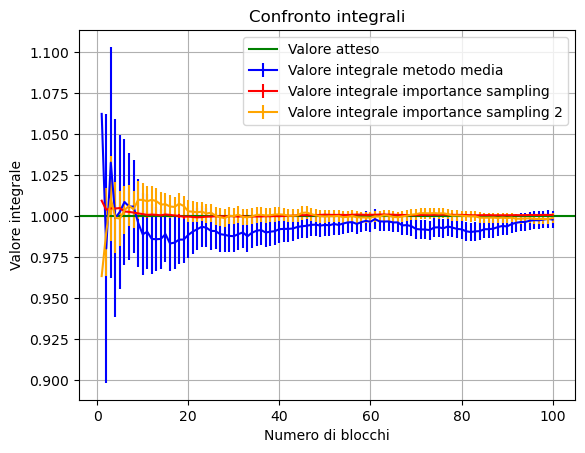

In [14]:
# Creazione del grafico sovrapposto
plt.errorbar(n, np.array(integr), yerr=np.array(integr_err), label='Valore integrale metodo media', color='blue')
plt.errorbar(n, np.array(integr_hom), yerr=np.array(err_hom), label='Valore integrale importance sampling', color='red')
plt.errorbar(n, np.array(integr_hom_brutto), yerr=np.array(err_hom_brutto), label='Valore integrale importance sampling 2', color='orange')
plt.title('Confronto integrali')
plt.xlabel('Numero di blocchi')
plt.ylabel('Valore integrale')
plt.axhline(y=1, color='green', label = "Valore atteso")
plt.legend()
plt.grid(True)
plt.show()

### Exercise 02.2
In questo esercizio viene simulato un random walk, sia nel continuo, che nel discreto, su un reticolo cubico. Questo viene fatto in due modi:
- nel discreto si usa una costante del reticolo $a=1$, che significa che, ad ogni passo, il camminatore si muove di $a$, avanti o indietro,  in una delle tre direzioni: $x,y,z$
- nel continuo invece ad ogni passo il camminatore si muove sempre di $a=1$, ma stavolta su una direzione random, ottenuta campionando uniformente un angolo solido, che quindi significa con $\theta\in[0,\pi]$ e $\Phi\in[0,2\pi]$. Questo viene fatto estraendo $\Phi$, ed estraendo poi il coseno di $\theta$ tra $-1$ e $1$, e ottenendo $sin\theta$ come $\sqrt{1-cos^2\theta}$ (questo viene fatto poichè, essendo un angolo solido definito come $d\Omega=sin\theta d\theta d\Phi$, la distribuzione con cui estraiamo $\theta$ non è uniforme).

E' stata poi fatta anche qui la media a blocchi, ed è stata calcolata l'incertezza. E' importante notare che l'errore associato al primo step è nullo, questo poichè non avrebbe senso calcolarla. Nei grafici delle celle seguenti possiamo vedere i risultati ottenuti nei due casi, e possiamo inoltre notare che i dati vengono fittati da una legge del tipo $f(N)=k\sqrt{N}$, dove $N$ è il numero di passi.

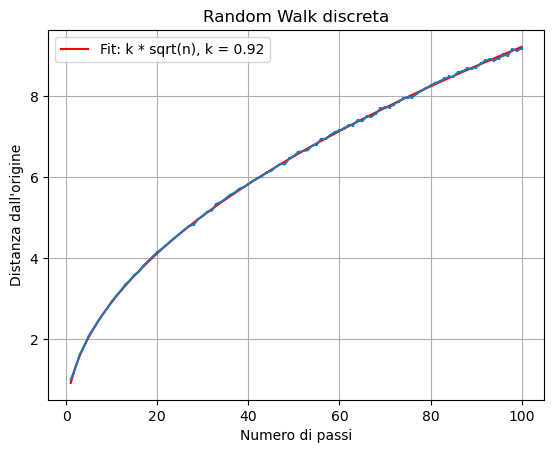

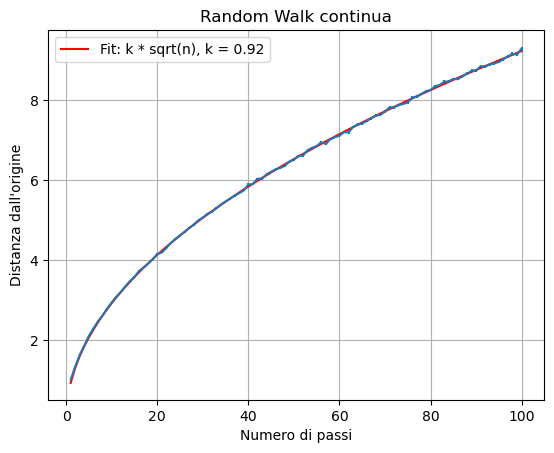

In [8]:
from scipy.optimize import curve_fit

# Funzione per il fit k*sqrt(n)
def sqrt_fit(n, k):
    return k * np.sqrt(n)

# Chiamata alla funzione per leggere i dati dal file
n, dist_discr, err_discr, dist_cont, err_cont = read_data_from_file("dati.dat")

# Esegue il fit dei dati discreti
popt_discr, pcov_discr = curve_fit(sqrt_fit, n, dist_discr)

# Esegue il fit dei dati continui
popt_cont, pcov_cont = curve_fit(sqrt_fit, n, dist_cont)

plt.errorbar(n, np.array(dist_discr), yerr=np.array(err_discr))
plt.plot(n, sqrt_fit(n, *popt_discr), color='red', label=f'Fit: k * sqrt(n), k = {popt_discr[0]:.2f}')
plt.title('Random Walk discreta')
plt.xlabel('Numero di passi')
plt.ylabel("Distanza dall'origine")
plt.grid(True)
plt.legend()
plt.show()

plt.errorbar(n, np.array(dist_cont), yerr=np.array(err_cont))
plt.plot(n, sqrt_fit(n, *popt_cont), color='red', label=f'Fit: k * sqrt(n), k = {popt_cont[0]:.2f}')
plt.title('Random Walk continua')
plt.xlabel('Numero di passi')
plt.ylabel("Distanza dall'origine")
plt.grid(True)
plt.legend()
plt.show()